In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load in our datasets
rb = pd.read_csv('Game_Logs_Runningback.csv')

In [3]:
#Check the dataframe to make sure it's working
rb.head()

Player Id           Name Position  Year          Season  Week  \
0  bobbyfowler/2514295  Fowler, Bobby      NaN  1985  Regular Season     7   
1  bobbyfowler/2514295  Fowler, Bobby      NaN  1985  Regular Season     8   
2  bobbyfowler/2514295  Fowler, Bobby      NaN  1985  Regular Season     9   
3  bobbyfowler/2514295  Fowler, Bobby      NaN  1985  Regular Season    10   
4  bobbyfowler/2514295  Fowler, Bobby      NaN  1985  Regular Season    11   

  Game Date Home or Away Opponent Outcome  ... Yards Per Carry  \
0     10/20         Away      ATL       L  ...              --   
1     10/27         Home      NYG       L  ...              --   
2     11/03         Away      RAM       L  ...              --   
3     11/10         Home      SEA       L  ...              --   
4     11/17         Away       GB       L  ...             1.0   

   Longest Rushing Run Rushing TDs Receptions Receiving Yards  \
0                   --          --         --              --   
1                   --          --         --              --   
2                   --          --          3              27   
3                   --          --         --              --   
4                    1           0         --              --   

  Yards Per Reception Longest Reception Receiving TDs Fumbles Fumbles Lost  
0                  --                --            --      --           --  
1                  --                --            --      --           --  
2                 9.0                10             0      --           --  
3                  --                --            --      --           --  
4                  --                --            --      --           --  

[5 rows x 25 columns]

In [4]:
#Check the shape of our dataframe
rb.shape

(67661, 25)

In [5]:
#We only care about regular season. Get rid of Preseason and probowl for obvious reasons, and postseason to stay 
#consistent with our other data sources
rb = rb[rb.Season == 'Regular Season']

In [6]:
#Lets check out the size of our data without these games
rb.shape

(58187, 25)

In [7]:
#We only care about games our players played in. If they did not play, we don't want their lack of stats in the data
rb = rb[rb['Games Played']==1]

In [8]:
#Check the shape again
rb.shape

(51705, 25)

In [9]:
#Now we are going to get the dataset ready. Our issue is our API and HTML are all season long stats, and our dataset
#From Kaggle either has career stats or game logs. So we will combine the stats by year. Luckily the 'Year' column 
#works, even for games that technically happen the next year. For example, the Year 2007 gives us all the games in 
#the 2007-2008 season. So we don't need to worry about games that happen in January etc.

In [10]:
#Lets change the missing data to 0s. The -- indicates 0
rb = rb.replace({'--':0})

#Turn everything into floats so we can sum them
rb['Receptions'] = rb['Receptions'].astype('float')
rb['Receiving Yards'] = rb['Receiving Yards'].astype('float')
rb['Receiving TDs'] = rb['Receiving TDs'].astype('float')
rb['Rushing Attempts'] = rb['Rushing Attempts'].astype('float')
rb['Rushing Yards'] = rb['Rushing Yards'].astype('float')
rb['Rushing TDs'] = rb['Rushing TDs'].astype('float')
rb['Fumbles'] = rb['Fumbles'].astype('float')
rb['Fumbles Lost'] = rb['Fumbles Lost'].astype('float')

In [11]:
#We need to names to be in first name then last name. It currently is last, first. So this will flip it for us.
rb.Name=rb.Name.str.split(', ').map(lambda x : ' '.join(x[::-1]))

#This puts all the games from a given year together. I almost wrote 300 lines of code to force do this and then found this. 
#Thank goodness
rushing = rb.groupby(['Name', 'Year']).sum()

#We create yards per rush/reception columns. And change things to 0 if they are dividing by 0. 

rushing['Yards per Rush'] = rushing['Rushing Yards'] / rushing['Rushing Attempts']
rushing['Yards per Rush'] = rushing['Yards per Rush'].fillna(0)

rushing['Yards per Reception'] = rushing['Receiving Yards'] / rushing['Receptions']
rushing['Yards per Reception'] = rushing['Yards per Reception'].fillna(0)

#We need to get rid of week because it is adding all our weeks and we don't need it. The others aren't significant to use.
rushing.drop(['Week', 'Fumbles', 'Fumbles Lost'], axis=1, inplace=True)

In [12]:
rushing

Games Played  Rushing Attempts  Rushing Yards  \
Name            Year                                                  
Aaron Green     2016             2               0.0            0.0   
Aaron Ripkowski 2015            15               0.0            0.0   
                2016            16              34.0          150.0   
Adam Walker     1987             2               5.0           24.0   
                1992             1               0.0            0.0   
...                            ...               ...            ...   
Zeph Lee        1987             3               0.0            0.0   
                1988             8               0.0            0.0   
                1989            13               0.0            0.0   
Zurlon Tipton   2014             6              10.0           18.0   
                2015            10               5.0           20.0   

                      Rushing TDs  Receptions  Receiving Yards  Receiving TDs  \
Name            Year                                                            
Aaron Green     2016          0.0         0.0              0.0            0.0   
Aaron Ripkowski 2015          0.0         1.0             18.0            0.0   
                2016          2.0         9.0             46.0            1.0   
Adam Walker     1987          0.0         2.0              3.0            0.0   
                1992          0.0         0.0              0.0            0.0   
...                           ...         ...              ...            ...   
Zeph Lee        1987          0.0         0.0              0.0            0.0   
                1988          0.0         0.0              0.0            0.0   
                1989          0.0         0.0              0.0            0.0   
Zurlon Tipton   2014          0.0         6.0             68.0            1.0   
                2015          0.0         5.0             57.0            0.0   

                      Yards per Rush  Yards per Reception  
Name            Year                                       
Aaron Green     2016        0.000000             0.000000  
Aaron Ripkowski 2015        0.000000            18.000000  
                2016        4.411765             5.111111  
Adam Walker     1987        4.800000             1.500000  
                1992        0.000000             0.000000  
...                              ...                  ...  
Zeph Lee        1987        0.000000             0.000000  
                1988        0.000000             0.000000  
                1989        0.000000             0.000000  
Zurlon Tipton   2014        1.800000            11.333333  
                2015        4.000000            11.400000  

[4434 rows x 9 columns]

In [13]:
#Now we have years 1970-2016. We will get 2017-2019 from html, and 2020 from our API. We are going to have a lot of this

url2017_1 = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=20&LeagueID=&order_by=RuYd&sort_order=DESC'
list_of_df = pd.read_html(url2017_1)

#Our table we want is the 7th
rushing17 = list_of_df[7]

#Let's rename our columns because it starts underneath when bringing it up
rushing17 = rushing17.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)

#And now we start where the players start
rushing17_1 = rushing17[2:]


#Page 2 of 2017

url2 = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=20&LeagueID=&order_by=RuYd&sort_order=DESC&cur_page=1'
list_of_df = pd.read_html(url2)

rushing17_2 = list_of_df[7]

rushing17_2 = rushing17_2.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
rushing17_2 = rushing17_2[2:]


#Page 3 of 2017

url3 = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=20&LeagueID=&order_by=RuYd&sort_order=DESC&cur_page=2'
list_of_df = pd.read_html(url3)

rushing17_3 = list_of_df[7]

rushing17_3 = rushing17_3.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
rushing17_3 = rushing17_3[2:]


#Page 4 of 2017

url4 = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=20&LeagueID=&order_by=RuYd&sort_order=DESC&cur_page=3'
list_of_df = pd.read_html(url4)

rushing17_4 = list_of_df[7]

rushing17_4 = rushing17_4.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
rushing17_4 = rushing17_4[2:]

In [14]:
#Now lets combine all our html tables and check it out
rushing17 = pd.concat([rushing17_1, rushing17_2, rushing17_3, rushing17_4])
rushing17.head()

Name Team Games Played Rushing Attempts Rushing Yards  \
2   1. Kareem Hunt   KC           16              272          1327   
3   2. Todd Gurley  LAR           15              279          1305   
4  3. Le'Veon Bell  PIT           15              321          1291   
5  4. LeSean McCoy  BUF           16              287          1138   
6   5. Mark Ingram   NO           16              230          1124   

  Rushing TDs Targets Receptions Receiving Yards Receiving TDs Fantasy Points  \
2           8      63         53             455             3          244.2   
3          13      87         64             788             6          323.3   
4           9     106         85             655             2          260.6   
5           6      77         59             448             2          206.6   
6          12      71         58             416             0          226.0   

   FPPG  
2  15.3  
3  21.6  
4  17.4  
5  12.9  
6  14.1

In [15]:
#We don't care about these columns
rushing17.drop(['Fantasy Points', 'FPPG', 'Team', 'Targets'], axis=1, inplace=True)

#Now let's get rid of the numbers in front of names
rushing17.Name = rushing17.Name.str.lstrip('0123456789.- ')

#Change these to floats so we can combine
rushing17[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 'Receptions', 
'Receiving Yards','Receiving TDs']] = rushing17[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 
                        'Receptions', 'Receiving Yards', 'Receiving TDs']].astype(float)

#Add a row for the year so we can combine later and groupby year
rushing17['Year'] = 2017

#And check out how this looks. Just alphabetizes them and sorts by year that are all the same but when combined will work
rushing17 = rushing17.groupby(['Name', 'Year']).sum()

In [16]:
#Add yards per rush/reception and get make the 0/0s into 0 instead of infinite/missing

rushing17['Yards per Rush'] = rushing17['Rushing Yards'] / rushing17['Rushing Attempts']
rushing17['Yards per Rush'] = rushing17['Yards per Rush'].fillna(0)
rushing17['Yards per Reception'] = rushing17['Receiving Yards'] / rushing17['Receptions']
rushing17['Yards per Reception'] = rushing17['Yards per Reception'].fillna(0)

In [17]:
#2017 looks good. Now to repeat

rushing17

Games Played  Rushing Attempts  Rushing Yards  \
Name              Year                                                  
Aaron Jones       2017          10.0              81.0          448.0   
Aaron Ripkowski   2017          11.0               5.0           13.0   
Adrian Peterson   2017          10.0             156.0          529.0   
Akeem Hunt        2017           7.0               8.0           23.0   
Alex Collins      2017          15.0             212.0          973.0   
...                              ...               ...            ...   
Tyler Ervin       2017           3.0               4.0           12.0   
Wayne Gallman     2017          13.0             111.0          476.0   
Wendell Smallwood 2017           8.0              47.0          174.0   
Zach Line         2017           7.0               7.0           28.0   
Zach Zenner       2017           7.0              14.0           26.0   

                        Rushing TDs  Receptions  Receiving Yards  \
Name              Year                                             
Aaron Jones       2017          4.0         9.0             22.0   
Aaron Ripkowski   2017          0.0         7.0             39.0   
Adrian Peterson   2017          2.0        11.0             70.0   
Akeem Hunt        2017          0.0         4.0             31.0   
Alex Collins      2017          6.0        23.0            187.0   
...                             ...         ...              ...   
Tyler Ervin       2017          0.0         8.0             38.0   
Wayne Gallman     2017          0.0        34.0            193.0   
Wendell Smallwood 2017          1.0        13.0            103.0   
Zach Line         2017          0.0         2.0              8.0   
Zach Zenner       2017          1.0         0.0              0.0   

                        Receiving TDs  Yards per Rush  Yards per Reception  
Name              Year                                                      
Aaron Jones       2017            0.0        5.530864             2.444444  
Aaron Ripkowski   2017            0.0        2.600000             5.571429  
Adrian Peterson   2017            0.0        3.391026             6.363636  
Akeem Hunt        2017            0.0        2.875000             7.750000  
Alex Collins      2017            0.0        4.589623             8.130435  
...                               ...             ...                  ...  
Tyler Ervin       2017            0.0        3.000000             4.750000  
Wayne Gallman     2017            1.0        4.288288             5.676471  
Wendell Smallwood 2017            0.0        3.702128             7.923077  
Zach Line         2017            1.0        4.000000             4.000000  
Zach Zenner       2017            0.0        1.857143             0.000000  

[160 rows x 9 columns]

In [18]:
#And now we do 2018 stats. Page 1:

url5 = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=20&LeagueID=&order_by=RuYd&sort_order=DESC'
list_of_df = pd.read_html(url5)

rushing18_1 = list_of_df[7]

rushing18_1 = rushing18_1.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
rushing18_1 = rushing18_1[2:]


#Page 2:

url6 = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=20&LeagueID=&order_by=RuYd&sort_order=DESC&cur_page=1'
list_of_df = pd.read_html(url6)

rushing18_2 = list_of_df[7]

rushing18_2 = rushing18_2.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
rushing18_2 = rushing18_2[2:]


#Page 3:

url7 = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=20&LeagueID=&order_by=RuYd&sort_order=DESC&cur_page=2'
list_of_df = pd.read_html(url7)

rushing18_3 = list_of_df[7]

rushing18_3 = rushing18_3.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
rushing18_3 = rushing18_3[2:]


#Page 4:

url8 = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=20&LeagueID=&order_by=RuYd&sort_order=DESC&cur_page=3'
list_of_df = pd.read_html(url8)

rushing18_4 = list_of_df[7]

rushing18_4 = rushing18_4.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
rushing18_4 = rushing18_4[2:]

In [19]:
#And combine all the dataframes:

rushing18 = pd.concat([rushing18_1, rushing18_2, rushing18_3, rushing18_4])

In [20]:
#Clean it up like we did for 2017

rushing18.drop(['Fantasy Points', 'FPPG', 'Team', 'Targets'], axis=1, inplace=True)

rushing18.Name = rushing18.Name.str.lstrip('0123456789.- ')

rushing18[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 'Receptions', 
'Receiving Yards','Receiving TDs']] = rushing18[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 
                        'Receptions', 'Receiving Yards', 'Receiving TDs']].astype(float)

rushing18['Year'] = 2018

rushing18 = rushing18.groupby(['Name', 'Year']).sum()

In [21]:
#Add our yards/rush and yards/reception columns

rushing18['Yards per Rush'] = rushing18['Rushing Yards'] / rushing18['Rushing Attempts']
rushing18['Yards per Rush'] = rushing18['Yards per Rush'].fillna(0)
rushing18['Yards per Reception'] = rushing18['Receiving Yards'] / rushing18['Receptions']
rushing18['Yards per Reception'] = rushing18['Yards per Reception'].fillna(0)

In [22]:
#And for 2019. Page 1:
url9 = 'https://www.fftoday.com/stats/playerstats.php?Season=2019&GameWeek=&PosID=20&LeagueID='
list_of_df = pd.read_html(url9)

rushing19_1 = list_of_df[7]
rushing19_1 = rushing19_1.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
rushing19_1 = rushing19_1[2:]


#Page 2:

url10 = 'https://www.fftoday.com/stats/playerstats.php?Season=2019&GameWeek=&PosID=20&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=1'
list_of_df = pd.read_html(url10)

rushing19_2 = list_of_df[7]
rushing19_2 = rushing19_2.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
rushing19_2 = rushing19_2[2:]


#Page 3:

url11 = 'https://www.fftoday.com/stats/playerstats.php?Season=2019&GameWeek=&PosID=20&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=2'
list_of_df = pd.read_html(url11)

rushing19_3 = list_of_df[7]
rushing19_3 = rushing19_3.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
rushing19_3 = rushing19_3[2:]


#Page 4:

url12 = 'https://www.fftoday.com/stats/playerstats.php?Season=2019&GameWeek=&PosID=20&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=3'
list_of_df = pd.read_html(url12)

rushing19_4 = list_of_df[7]
rushing19_4 = rushing19_4.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Rushing Attempts', 4:'Rushing Yards', 5:'Rushing TDs',
                 6:'Targets', 7:'Receptions', 8:'Receiving Yards', 9:'Receiving TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
rushing19_4 = rushing19_4[2:]

#Combine
rushing19 = pd.concat([rushing19_1, rushing19_2, rushing19_3, rushing19_4])

In [23]:
#Clean and add. Like we have done

rushing19.drop(['Fantasy Points', 'FPPG', 'Team', 'Targets'], axis=1, inplace=True)

rushing19.Name = rushing19.Name.str.lstrip('0123456789.- ')

rushing19[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 'Receptions', 
'Receiving Yards','Receiving TDs']] = rushing19[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 
                        'Receptions', 'Receiving Yards', 'Receiving TDs']].astype(float)

rushing19['Year'] = 2019

rushing19 = rushing19.groupby(['Name', 'Year']).sum()

In [24]:
#Add the same rows

rushing19['Yards per Rush'] = rushing19['Rushing Yards'] / rushing19['Rushing Attempts']
rushing19['Yards per Rush'] = rushing19['Yards per Rush'].fillna(0)
rushing19['Yards per Reception'] = rushing19['Receiving Yards'] / rushing19['Receptions']
rushing19['Yards per Reception'] = rushing19['Yards per Reception'].fillna(0)

In [25]:
#Now we import json and url parsing to get info from our API for the 2020 data

import urllib.request, urllib.parse, urllib.error
import json

In [26]:
#This gets all the player stats from 2020 from our API. 
#WARNING: This API is awful. I couldn't find another free and easy to use API, but this API is not recommended. For one
#the names are saved as First Initial Last Name. Which means I had to manually enter in every single full name so we 
#could combine them with other years. It was not fun. Also the data seems to be... wrong. I wasn't sure what to do about 
#it, but even looking at the data below, we have 1.1 pass attempts and completions. We know that isn't possible because...
#well yeah. All numbers are coded like this. For numbers 0-9, we can take the floor and I think it matches up. But for
#numbers above 9, the numbers are off. An example, this season Deebo Samuel had 33 receptions and 391 receiving yards.
#The API shows 34.4 receptions and 407.4. There isn't a formula I can think of to adjust for this. So I left it, and 
#didn't know what to do. If I was doing this as part of a company or project, I would dish out the money for hopefully 
#a decent API. For now the numers are close, but will look weird, because they are. Sorry.

url = 'https://api.sportsdata.io/v3/nfl/stats/json/PlayerSeasonStats/2020?key=d4109271ac4b4e508909f4920961c3ad'
uh = urllib.request.urlopen(url)
data = uh.read()
json_data=json.loads(data)

In [27]:
#Here is our API data from 2020.
json_data

[{'PlayerID': 430,
  'SeasonType': 1,
  'Season': 2020,
  'Team': 'BAL',
  'Number': 4,
  'Name': 'S.Koch',
  'Position': 'P',
  'PositionCategory': 'ST',
  'Activated': 15,
  'Played': 15,
  'Started': 0,
  'PassingAttempts': 1.1,
  'PassingCompletions': 1.1,
  'PassingYards': 15.6,
  'PassingCompletionPercentage': 104.2,
  'PassingYardsPerAttempt': 15.6,
  'PassingYardsPerCompletion': 15.6,
  'PassingTouchdowns': 0.0,
  'PassingInterceptions': 0.0,
  'PassingRating': 123.7,
  'PassingLong': 15.6,
  'PassingSacks': 0.0,
  'PassingSackYards': 0.0,
  'RushingAttempts': 0.0,
  'RushingYards': 0.0,
  'RushingYardsPerAttempt': 0.0,
  'RushingTouchdowns': 0.0,
  'RushingLong': 0.0,
  'ReceivingTargets': 0.0,
  'Receptions': 0.0,
  'ReceivingYards': 0.0,
  'ReceivingYardsPerReception': 0.0,
  'ReceivingTouchdowns': 0.0,
  'ReceivingLong': 0.0,
  'Fumbles': 0.0,
  'FumblesLost': 0.0,
  'PuntReturns': 0.0,
  'PuntReturnYards': 0.0,
  'PuntReturnYardsPerAttempt': 0.0,
  'PuntReturnTouchdowns': 

In [28]:
#Get all the RBs
RBs_json = list(filter(lambda x:x["Position"]=="RB",json_data))
#And all the FBs
FBs_json = list(filter(lambda x:x["Position"]=="FB",json_data))

In [29]:
#Create the RB dataframe
RBs = pd.json_normalize(RBs_json)
#And the FBs
FBs = pd.json_normalize(FBs_json)

In [30]:
#Take only the columns we want

RBs = RBs[['Name', 'Team', 'Played', 'RushingAttempts', 'RushingYards', 'RushingTouchdowns',
   'Receptions', 'ReceivingYards', 'ReceivingTouchdowns']]

FBs = FBs[['Name', 'Team', 'Played', 'RushingAttempts', 'RushingYards', 'RushingTouchdowns',
   'Receptions', 'ReceivingYards', 'ReceivingTouchdowns']]

In [31]:
#And we make our dataframe from 2020. 

rushing20 = pd.concat([RBs, FBs])

In [32]:
#Let's rename our columns to match the rest of our dataframe for combining
rushing20 = rushing20.rename(columns={'Played':'Games Played', 'RushingAttempts': 'Rushing Attempts', 'RushingYards':'Rushing Yards',
                     'RushingTouchdowns':'Rushing TDs', 'ReceivingYards':'Receiving Yards', 'ReceivingTouchdowns':'Receiving TDs'})

In [33]:
#We need to reset the index since we combined two dataframes
rushing20 = rushing20.reset_index(drop=True)

In [34]:
#And here we go. We need to go through the entire list of names, write out their full first name and then we will throw out
#the name column, make a new column with these names and index based off them. Sorry for this. WRs will be worse.

list_of_names = ['Adrian Peterson', 'Frank Gore', 'LeSean McCoy', 'Dion Lewis', 'Taiwon Jones', 'Mark Ingram', 'Brandon Bolden',
                'Lamar Miller', 'Alfred Morris', 'Giovani Bernard', 'Rex Burkhead', "Le'Veon Bell", 'Latavius Murray', 'Chris Thompson',
                'Theo Riddick', 'Kenjon Barner', 'Damien Williams', 'James White', 'Senorise Perry', 'Jerick McKinnon', 'Devonta Freeman',
                'Carlos Hyde', 'Todd Gurley', 'Melvin Gordon', 'T.J. Yeldon', 'Ameer Abdullah', 'Tevin Coleman', 'Duke Johnson', 'David Johnson',
                'Ty Montgomery', 'Mike Davis', 'Malcolm Brown', 'Raheem Mostert', 'Ezekiel Elliott', 'Derrick Henry', 'C.J. Prosise', 
                'Devontae Booker', 'Kenyan Drake', 'Tyler Ervin', 'DeAndre Washington', 'Jordan Howard', 'Wendell Smallwood',
                'Jonathan Williams', 'Alex Collins', 'DeAndre Washington', 'D.J. Foster', 'Peyton Barber', 'J.D. McKissic', 'Elijhaa Penny',
                'Jalen Richard', 'Troymaine Pope', 'Leonard Fournette', 'Joe Mixon', 'Dalvin Cook', 'Christian McCaffrey', 'Alvin Kamara',
                'Kareem Hunt', "D'Onta Foreman", 'James Conner', 'Samaje Perine', 'Jamaal Williams', 'Wayne Gallman', 'Marlon Mack', 'Tarik Cohen',
                'T.J. Logan', 'Brian Hill', 'Aaron Jones', 'Jeremy McNichols', 'Elijah McGuire', 'Chris Carson', 'Matt Breida', 'Corey Clement',
                'Austin Ekeler', 'Terell Edmunds', 'Dare Ogunbowale', 'Saquon Barkley', 'Nick Chubb', 'Rashaad Penny', 'Kerryon Johnson',
                'Royce Freeman', 'Kalen Ballage', 'Sony Michel', 'Ronald Jones', 'Nyheim Hines', 'Chase Edmonds', 'Ito Smith', 'Jordan Wilkins',
                'Jalen Samuels', 'Bo Scarbrough', 'Boston Scott', 'Trenton Cannon', 'Justin Jackson', 'Josh Adams', 'Reggie Bonnafon', 'Ryan Nall',
                'Phillip Lindsay', 'Mike Boone', 'Gus Edwards', 'Buddy Howell', 'Jeff Wilson', 'Darrel Williams', 'Dontrell Hilliard', 'Dalyn Dawkins',
                'Ryquell Armstead', 'Myles Gaskin', 'Damien Harris', 'Darrell Henderson', 'Justice Hill', 'Elijah Holyfield', 'Travis Homer', 'Josh Jacobs',
                'Ty Johnson', 'Bryce Love', 'Alexander Mattison', 'David Montgomery', 'Qadree Ollison', 'Devine Ozigbo', 'Tony Pollard', 'Miles Sanders',
                'Devin Singletary', 'Benny Snell', 'Darwin Thompson', 'Mike Weber', 'Dexter Williams', 'Trayveon Williams', 'Christian Wade',
                'Jeremy Cox', 'Patrick Laird', 'Khari Blasingame', 'Austin Walter', 'Tony Brooks-James', 'Craig Reynolds', "D'Ernest Johnson", 'J.K. Dobbins',
                'Jonathan Taylor', "De'Andre Swift", 'Cam Akers', 'Jason Huntley', 'JaMycal Hasty', 'Clyde Edwards-Helaire', 'Eno Benjamin', 'Tony Jones',
                'Rodney Smith', 'Josh Kelley', 'Jonathan Ward', 'Zack Moss', 'Javon Leake', "Ke'Shawn Vaughn", 'Darius Anderson', 'Michael Warren',
                "La'Mical Perine", 'A.J. Dillon', 'D.J. Dallas', 'Darius Bradwell', 'J.J. Taylor', 'Xavier Jones', 'Adrian Killins', 'Salvon Ahmed',
                'Darrynton Evans', 'LeVante Bellamy', 'Artavis Pierce', 'A.J. McFarland', 'Raymond Calais', 'Scottie Phillips', 'Antonio Gibson', 
                'Rico Dowdle', 'James Robinson', "Ty'Son Williams", 'Antonio Williams', 'Nathan Cottrell', 'Nick Bellore', 'Anthony Sherman',
                'Bruce Miller', 'Jamize Olawale', 'Kyle Juszczyk', 'Keith Smith', 'Michael Burton', 'Andy Janovich', 'Danny Vitale',
                'Derek Watt', 'C.J. Ham', 'Alex Armah', 'Patrick Ricard', 'Johnny Stanton', 'Alec Ingold', 'Jakob Johnson', 'Cullen Gillaspia',
                'Chandler Cox', 'Sewo Olonilua', 'Gabe Nabers', 'Jake Bargas', 'Josh Hokit']

#And now make it an array so it gets into our dataframe
array_of_names = np.asarray(list_of_names)

In [35]:
#Get rid of the abbreviated names
rushing20.drop('Name', axis=1, inplace=True)

In [36]:
#Make our new column
rushing20['Name'] = array_of_names

In [37]:
#Make our yards per rush and yards per reception columns, as well as Year. Also take it all with a grain of salt since
#2020 data will be off

rushing20['Yards per Rush'] = rushing20['Rushing Yards'] / rushing20['Rushing Attempts']
rushing20['Yards per Rush'] = rushing20['Yards per Rush'].fillna(0)
rushing20['Yards per Reception'] = rushing20['Receiving Yards'] / rushing20['Receptions']
rushing20['Yards per Reception'] = rushing20['Yards per Reception'].fillna(0)
rushing20['Year'] = 2020
rushing20 = rushing20.groupby(['Name', 'Year']).sum()

In [38]:
#Let's check it out. The numbers are bad, but we have 49 years of good info.

rushing20

Games Played  Rushing Attempts  Rushing Yards  \
Name              Year                                                  
A.J. Dillon       2020            11              47.9          252.2   
A.J. McFarland    2020            11              34.4          117.7   
Aaron Jones       2020            14             209.4         1150.4   
Adrian Killins    2020             1               1.1          -12.5   
Adrian Peterson   2020            16             162.6          629.4   
...                              ...               ...            ...   
Tyler Ervin       2020             8              13.5           69.8   
Wayne Gallman     2020            15             153.2          710.6   
Wendell Smallwood 2020             1               0.0            0.0   
Xavier Jones      2020            13               0.0            0.0   
Zack Moss         2020            13             116.7          501.2   

                        Rushing TDs  Receptions  Receiving Yards  \
Name              Year                                             
A.J. Dillon       2020          2.2         2.2             21.9   
A.J. McFarland    2020          0.0         6.5             56.3   
Aaron Jones       2020          9.8        49.0            369.9   
Adrian Killins    2020          0.0         1.1              2.2   
Adrian Peterson   2020          7.6        12.5            105.2   
...                             ...         ...              ...   
Tyler Ervin       2020          0.0        11.5             87.5   
Wayne Gallman     2020          6.5        21.9            118.8   
Wendell Smallwood 2020          0.0         0.0              0.0   
Xavier Jones      2020          0.0         0.0              0.0   
Zack Moss         2020          4.3        14.6             99.0   

                        Receiving TDs  Yards per Rush  Yards per Reception  
Name              Year                                                      
A.J. Dillon       2020            0.0        5.265136             9.954545  
A.J. McFarland    2020            0.0        3.421512             8.661538  
Aaron Jones       2020            2.2        5.493792             7.548980  
Adrian Killins    2020            0.0      -11.363636             2.000000  
Adrian Peterson   2020            0.0        3.870849             8.416000  
...                               ...             ...                  ...  
Tyler Ervin       2020            0.0        5.170370             7.608696  
Wayne Gallman     2020            0.0        4.638381             5.424658  
Wendell Smallwood 2020            0.0        0.000000             0.000000  
Xavier Jones      2020            0.0        0.000000             0.000000  
Zack Moss         2020            1.1        4.294773             6.780822  

[191 rows x 9 columns]

In [39]:
#Now we combine everything. We will have to reindex since it is going to stick the new years at the bottom but it'll
#Be fine

combined_rushing1 = pd.concat([rushing, rushing17, rushing18, rushing19, rushing20])

In [40]:
#New Groupby
combined_rushing = combined_rushing1.groupby(['Name', 'Year']).sum()

In [41]:
#Get rid of players that didn't play a game
combined_rushing = combined_rushing[combined_rushing['Games Played'] > 0]

#And get rid of players than had no rushing attempts on a season. They may be practice squad members or cut but we 
#don't get anything useful out of them
combined_rushing = combined_rushing[combined_rushing['Rushing Attempts']>0]

In [42]:
#And here is our RB and FB stats from every season since 1970 all in one dataframe.
combined_rushing

Games Played  Rushing Attempts  Rushing Yards  \
Name           Year                                                  
A.J. Dillon    2020          11.0              47.9          252.2   
A.J. McFarland 2020          11.0              34.4          117.7   
Aaron Jones    2017          10.0              81.0          448.0   
               2018          12.0             133.0          728.0   
               2019          16.0             236.0         1084.0   
...                           ...               ...            ...   
Zach Zenner    2018           7.0              55.0          265.0   
               2019           3.0               3.0           -2.0   
Zack Moss      2020          13.0             116.7          501.2   
Zurlon Tipton  2014           6.0              10.0           18.0   
               2015          10.0               5.0           20.0   

                     Rushing TDs  Receptions  Receiving Yards  Receiving TDs  \
Name           Year                                                            
A.J. Dillon    2020          2.2         2.2             21.9            0.0   
A.J. McFarland 2020          0.0         6.5             56.3            0.0   
Aaron Jones    2017          4.0         9.0             22.0            0.0   
               2018          8.0        26.0            206.0            1.0   
               2019         16.0        49.0            474.0            3.0   
...                          ...         ...              ...            ...   
Zach Zenner    2018          3.0         7.0             56.0            0.0   
               2019          0.0         2.0             19.0            0.0   
Zack Moss      2020          4.3        14.6             99.0            1.1   
Zurlon Tipton  2014          0.0         6.0             68.0            1.0   
               2015          0.0         5.0             57.0            0.0   

                     Yards per Rush  Yards per Reception  
Name           Year                                       
A.J. Dillon    2020        5.265136             9.954545  
A.J. McFarland 2020        3.421512             8.661538  
Aaron Jones    2017        5.530864             2.444444  
               2018        5.473684             7.923077  
               2019        4.593220             9.673469  
...                             ...                  ...  
Zach Zenner    2018        4.818182             8.000000  
               2019       -0.666667             9.500000  
Zack Moss      2020        4.294773             6.780822  
Zurlon Tipton  2014        1.800000            11.333333  
               2015        4.000000            11.400000  

[4495 rows x 9 columns]

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

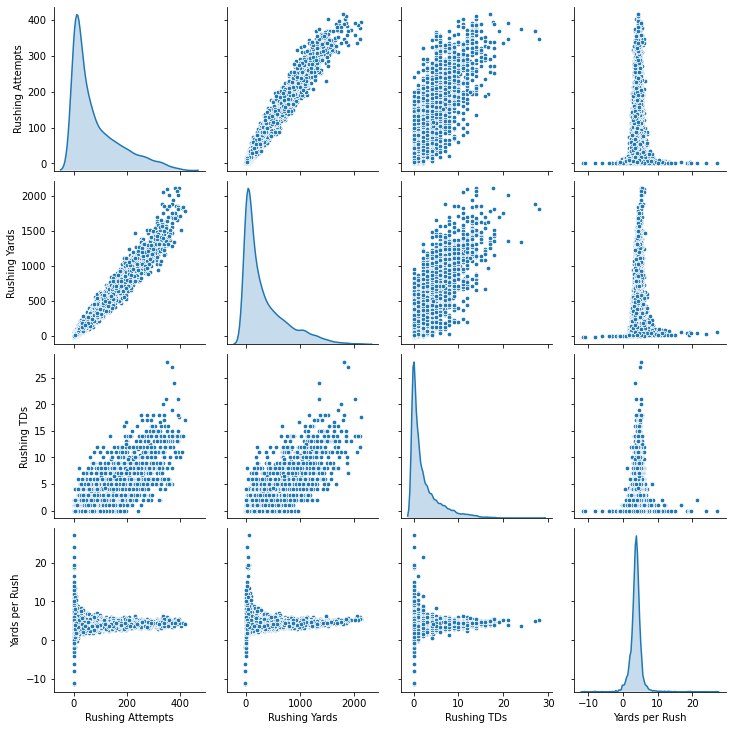

In [44]:
#Here we can look at the scatters and distributions of the numerical data. For running backs let's look at rushing 
#tendencies and how our data looks. 

numerics = combined_rushing[['Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 'Yards per Rush']]
sns.pairplot(numerics, diag_kind='kde', plot_kws={"s": 21})
plt.show()

In [45]:
#I also want to combine all our data by year and look at how things change over the years

rush_by_year = combined_rushing.groupby(['Year']).sum()
rush_by_year.head()

Games Played  Rushing Attempts  Rushing Yards  Rushing TDs  Receptions  \
Year                                                                           
1970         754.0            5356.0        19627.0        139.0       999.0   
1971         857.0            5688.0        22493.0        155.0      1018.0   
1972         918.0            6381.0        25719.0        165.0      1092.0   
1973         877.0            5790.0        22645.0        138.0       979.0   
1974        1048.0            5846.0        22321.0        160.0      1064.0   

      Receiving Yards  Receiving TDs  Yards per Rush  Yards per Reception  
Year                                                                       
1970           8641.0           43.0      256.656380           546.698218  
1971           9130.0           43.0      283.592136           579.322317  
1972          10213.0           46.0      305.278443           637.443532  
1973           8581.0           36.0      301.640377           608.343757  
1974           8598.0           46.0      305.796555           653.484178

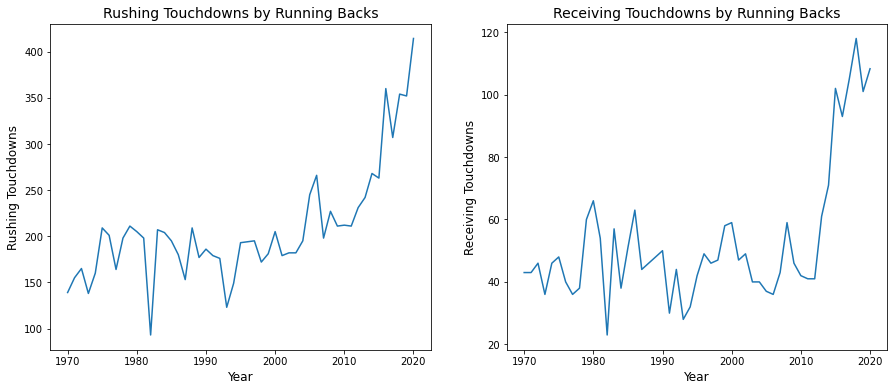

In [46]:
#Let's plot touchdowns through the years. Remember, the 2020 data will be semi indicative, but will be much higher 
#than it should be. 

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(rush_by_year['Rushing TDs'])
plt.title('Rushing Touchdowns by Running Backs', fontsize=14)
plt.xlabel('Year', fontsize=12), plt.ylabel('Rushing Touchdowns', fontsize=12)

plt.subplot(122)
plt.plot(rush_by_year['Receiving TDs'])
plt.title('Receiving Touchdowns by Running Backs', fontsize=14)
plt.xlabel('Year', fontsize=12), plt.ylabel('Receiving Touchdowns', fontsize=12)
plt.show()


In [47]:
#Let's look at just one player. Frank Gore should have plenty of information

gore = combined_rushing.loc['Frank Gore']
gore_numerics = gore[['Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 'Yards per Rush']]

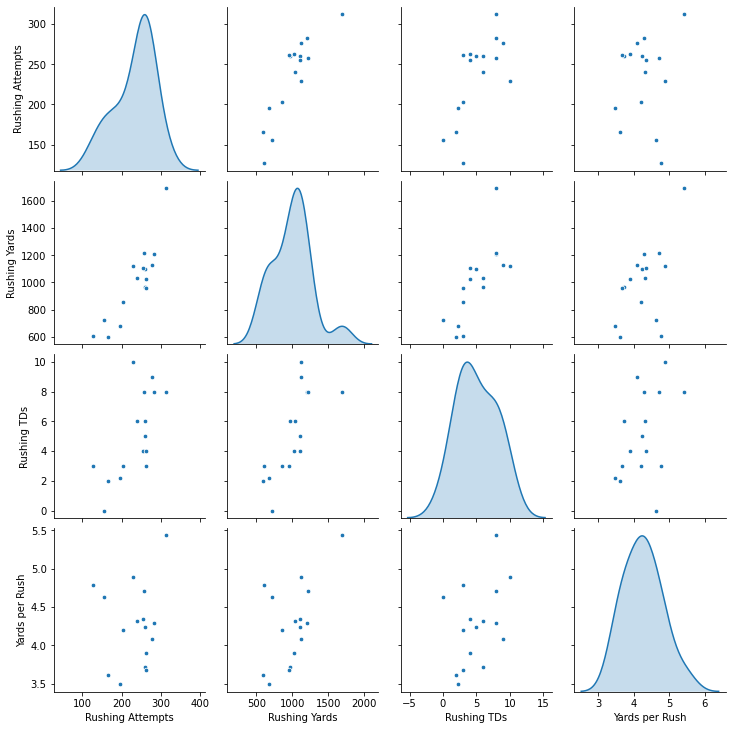

In [48]:
#Pairplot of Frank Gore's data
sns.pairplot(gore_numerics, diag_kind='kde', plot_kws={"s": 21})
plt.show()

In [49]:
#Now to do it all again for our Wide Receivers and TEs
wr = pd.read_csv('Game_Logs_Wide_Receiver_and_Tight_End.csv')

In [50]:
#It will be a lot of the same all the way through. We only want regular season games
wr = wr[wr.Season == 'Regular Season']

In [51]:
#Only want games they played in
wr = wr[wr['Games Played']==1]

In [52]:
#Makes categories that a player didn't record a stat into a 0
wr = wr.replace({'--':0})

#Turn everything into floats so we can sum them
wr['Receptions'] = wr['Receptions'].astype('float')
wr['Receiving Yards'] = wr['Receiving Yards'].astype('float')
wr['Receiving TDs'] = wr['Receiving TDs'].astype('float')
wr['Rushing Attempts'] = wr['Rushing Attempts'].astype('float')
wr['Rushing Yards'] = wr['Rushing Yards'].astype('float')
wr['Rushing TDs'] = wr['Rushing TDs'].astype('float')
wr['Fumbles'] = wr['Fumbles'].astype('float')
wr['Fumbles Lost'] = wr['Fumbles Lost'].astype('float')

In [53]:
#Rearrange the names to match everything. We want first name then last name

wr.Name = wr.Name.str.split(', ').map(lambda x: ' '.join(x[::-1]))
receiving = wr.groupby(['Name', 'Year']).sum()

In [54]:
#Remove columns we don't want
receiving.drop(['Week', 'Fumbles', 'Fumbles Lost'], axis=1, inplace=True)

In [55]:
#Add columns we do want

receiving['Yards per Reception'] = receiving['Receiving Yards'] / receiving['Receptions']
receiving['Yards per Reception'] = receiving['Yards per Reception'].fillna(0)
receiving['Yards per Rush'] = receiving['Rushing Yards'] / receiving['Rushing Attempts']
receiving['Yards per Rush'] = receiving['Yards per Rush'].fillna(0)

In [56]:
#Page 1 2017:
url = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=30&LeagueID='
list_of_df = pd.read_html(url)

receiving17_1 = list_of_df[7]

receiving17_1 = receiving17_1.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving17_1 = receiving17_1[2:]


#Page 2 2017:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=1'
list_of_df = pd.read_html(url)

receiving17_2 = list_of_df[7]

receiving17_2 = receiving17_2.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving17_2 = receiving17_2[2:]


#Page 3 2017:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=2'
list_of_df = pd.read_html(url)

receiving17_3 = list_of_df[7]

receiving17_3 = receiving17_3.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving17_3 = receiving17_3[2:]


#Page 4 2017:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=3'
list_of_df = pd.read_html(url)

receiving17_4 = list_of_df[7]

receiving17_4 = receiving17_4.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving17_4 = receiving17_4[2:]

#Page 5 2017:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=4'
list_of_df = pd.read_html(url)

receiving17_5 = list_of_df[7]

receiving17_5 = receiving17_5.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving17_5 = receiving17_5[2:]


#TE 2017 Page 1

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=40&LeagueID='
list_of_df = pd.read_html(url)

te17_1 = list_of_df[7]

te17_1 = te17_1.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Fantasy Points', 8:'FPPG'}, axis=1)
te17_1 = te17_1[2:]


#TE2017 Page 2:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=40&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=1'
list_of_df = pd.read_html(url)

te17_2 = list_of_df[7]

te17_2 = te17_2.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Fantasy Points', 8:'FPPG'}, axis=1)
te17_2 = te17_2[2:]


#TE 2017 Page 3:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2017&GameWeek=&PosID=40&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=2'
list_of_df = pd.read_html(url)

te17_3 = list_of_df[7]

te17_3 = te17_3.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Fantasy Points', 8:'FPPG'}, axis=1)
te17_3 = te17_3[2:]

In [57]:
#Combine everything

receiving17 = pd.concat([receiving17_1,receiving17_2,receiving17_3,receiving17_4,receiving17_5, te17_1, te17_2, te17_3])


#Drop these categories
receiving17.drop(['Fantasy Points', 'FPPG', 'Team', 'Targets'], axis=1, inplace=True)

#Fix the names
receiving17.Name = receiving17.Name.str.lstrip('0123456789.- ')


#Change columns to floats
receiving17[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 'Receptions', 
'Receiving Yards','Receiving TDs']] = receiving17[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 
                        'Receptions', 'Receiving Yards', 'Receiving TDs']].astype(float)

#Add the columns
receiving17['Year'] = 2017
receiving17['Yards per Reception'] = receiving17['Receiving Yards'] / receiving17['Receptions']
receiving17['Yards per Reception'] = receiving17['Yards per Reception'].fillna(0)
receiving17['Yards per Rush'] = receiving17['Rushing Yards'] / receiving17['Rushing Attempts']
receiving17['Yards per Rush'] = receiving17['Yards per Rush'].fillna(0)


#And groupby
receiving17 = receiving17.groupby(['Name', 'Year']).sum()

In [58]:
#Same for 2018. Page 1:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC'
list_of_df = pd.read_html(url)

receiving18_1 = list_of_df[7]

receiving18_1 = receiving18_1.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving18_1 = receiving18_1[2:]


#Page 2:
url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=1'
list_of_df = pd.read_html(url)

receiving18_2 = list_of_df[7]

receiving18_2 = receiving18_2.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving18_2 = receiving18_2[2:]


#Page 3:
url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=2'
list_of_df = pd.read_html(url)

receiving18_3 = list_of_df[7]

receiving18_3 = receiving18_3.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving18_3 = receiving18_3[2:]

#Page 4:
url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=3'
list_of_df = pd.read_html(url)

receiving18_4 = list_of_df[7]

receiving18_4 = receiving18_4.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving18_4 = receiving18_4[2:]


#Page 5:
url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=4'
list_of_df = pd.read_html(url)

receiving18_5 = list_of_df[7]

receiving18_5 = receiving18_5.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving18_5 = receiving18_5[2:]

#TEs:
#Page1
url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=40&LeagueID='
list_of_df = pd.read_html(url)

te18_1 = list_of_df[7]

te18_1 = te18_1.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Fantasy Points', 8:'FPPG'}, axis=1)
te18_1 = te18_1[2:]

#Page 2

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=40&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=1'
list_of_df = pd.read_html(url)

te18_2 = list_of_df[7]

te18_2 = te18_2.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Fantasy Points', 8:'FPPG'}, axis=1)
te18_2 = te18_2[2:]


#Page 3:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=40&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=2'
list_of_df = pd.read_html(url)

te18_3 = list_of_df[7]

te18_3 = te18_3.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Fantasy Points', 8:'FPPG'}, axis=1)
te18_3 = te18_3[2:]

In [59]:
#Combine and clean the dataframe. We've done this 5 times now

receiving18 = pd.concat([receiving18_1, receiving18_2, receiving18_3, receiving18_4, receiving18_5, te18_1, te18_2, te18_3])

receiving18.drop(['Fantasy Points', 'FPPG', 'Team', 'Targets'], axis=1, inplace=True)

receiving18.Name = receiving18.Name.str.lstrip('0123456789.- ')

receiving18[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 'Receptions', 
'Receiving Yards','Receiving TDs']] = receiving18[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 
                        'Receptions', 'Receiving Yards', 'Receiving TDs']].astype(float)

receiving18['Year'] = 2018
receiving18['Yards per Reception'] = receiving18['Receiving Yards'] / receiving18['Receptions']
receiving18['Yards per Reception'] = receiving18['Yards per Reception'].fillna(0)
receiving18['Yards per Rush'] = receiving18['Rushing Yards'] / receiving18['Rushing Attempts']
receiving18['Yards per Rush'] = receiving18['Yards per Rush'].fillna(0)

receiving18 = receiving18.groupby(['Name', 'Year']).sum()

In [60]:
#One last time
#2019 Page1:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2019&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC'
list_of_df = pd.read_html(url)

receiving19_1 = list_of_df[7]

receiving19_1 = receiving19_1.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving19_1 = receiving19_1[2:]

#2019 Page 2:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=1'
list_of_df = pd.read_html(url)

receiving19_2 = list_of_df[7]

receiving19_2 = receiving19_2.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving19_2 = receiving19_2[2:]

#2019 Page 3:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=2'
list_of_df = pd.read_html(url)

receiving19_3 = list_of_df[7]

receiving19_3 = receiving19_3.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving19_3 = receiving19_3[2:]

#2019 Page 4:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=3'
list_of_df = pd.read_html(url)

receiving19_4 = list_of_df[7]

receiving19_4 = receiving19_4.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving19_4 = receiving19_4[2:]


#2019 Page 5:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2018&GameWeek=&PosID=30&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=4'
list_of_df = pd.read_html(url)

receiving19_5 = list_of_df[7]

receiving19_5 = receiving19_5.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Rushing Attempts', 8:'Rushing Yards', 9:'Rushing TDs', 10:'Fantasy Points', 11:'FPPG'}, axis=1)
receiving19_5 = receiving19_5[2:]

#TEs page 1:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2019&GameWeek=&PosID=40&LeagueID='
list_of_df = pd.read_html(url)

te19_1 = list_of_df[7]

te19_1 = te19_1.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Fantasy Points', 8:'FPPG'}, axis=1)
te19_1 = te19_1[2:]

#TEs page 2:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2019&GameWeek=&PosID=40&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=1'
list_of_df = pd.read_html(url)

te19_2 = list_of_df[7]

te19_2 = te19_2.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Fantasy Points', 8:'FPPG'}, axis=1)
te19_2 = te19_2[2:]

#TEs page 3:

url = 'https://www.fftoday.com/stats/playerstats.php?Season=2019&GameWeek=&PosID=40&LeagueID=&order_by=FFPts&sort_order=DESC&cur_page=2'
list_of_df = pd.read_html(url)

te19_3 = list_of_df[7]

te19_3 = te19_3.rename({0:'Name', 1:'Team', 2:'Games Played', 3:'Targets', 4:'Receptions', 5:'Receiving Yards',
                 6:'Receiving TDs', 7:'Fantasy Points', 8:'FPPG'}, axis=1)
te19_3 = te19_3[2:]

In [61]:
#Combine, clean, delete, add

receiving19 = pd.concat([receiving19_1, receiving19_2, receiving19_3, receiving19_4, receiving19_5, te19_1, te19_2, te19_3])

receiving19.drop(['Fantasy Points', 'FPPG', 'Team', 'Targets'], axis=1, inplace=True)

receiving19.Name = receiving19.Name.str.lstrip('0123456789.- ')

receiving19[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 'Receptions', 
'Receiving Yards','Receiving TDs']] = receiving19[['Games Played', 'Rushing Attempts', 'Rushing Yards', 'Rushing TDs', 
                        'Receptions', 'Receiving Yards', 'Receiving TDs']].astype(float)

receiving19['Year'] = 2019
receiving19['Yards per Reception'] = receiving19['Receiving Yards'] / receiving19['Receptions']
receiving19['Yards per Reception'] = receiving19['Yards per Reception'].fillna(0)
receiving19['Yards per Rush'] = receiving19['Rushing Yards'] / receiving19['Rushing Attempts']
receiving19['Yards per Rush'] = receiving19['Yards per Rush'].fillna(0)

receiving19 = receiving19.groupby(['Name', 'Year']).sum()

In [62]:
#2020 time from our lovely API

#Get all the WRs
WRs_json = list(filter(lambda x:x["Position"]=="WR",json_data))
#And all the TEs
TEs_json = list(filter(lambda x:x["Position"]=="TE",json_data))

In [63]:
#Create the RB dataframe
WRs = pd.json_normalize(WRs_json)
#And the FBs
TEs = pd.json_normalize(TEs_json)

In [64]:
#Get the columns we want

WRs = WRs[['Name', 'Team', 'Played', 'Receptions', 'ReceivingYards', 'ReceivingTouchdowns', 
           'RushingAttempts', 'RushingYards', 'RushingTouchdowns']]

TEs = TEs[['Name', 'Team', 'Played', 'Receptions', 'ReceivingYards', 'ReceivingTouchdowns', 
           'RushingAttempts', 'RushingYards', 'RushingTouchdowns']]

receiving20 = pd.concat([WRs, TEs])

In [65]:
#And here...we... go. https://www.youtube.com/watch?v=xSLlZh9yelk
#I am ashamed to say I had to do this twice... because the length of this was one shorter than the actual dataframe
#So yeah, that was fun. Oh so fun. Sorry I forgot your boy Mike Gesicki. And now I will never draft him because I had 
#to do this.

list_of_names2 = ['Desean Jackson', 'Larry Fitzgerald', 'Matthew Slater', 'Julian Edelman', 'Danny Amendola', 'Antonio Brown',
                'Emmanuel Sanders', 'Dez Bryant', 'Joe Webb', 'Andre Roberts', 'Golden Tate', 'Ted Ginn', 'A.J. Green', 'Demetrius Harris', 'Randall Cobb',
                'Julio Jones', 'Marvin Jones', 'Mohamed Sanu', 'Travis Benjamin', 'T.Y. Hilton', 'Cole Beasley', 'Alshon Jeffery',
                'Josh Gordon', 'Chris Hogan', 'Marquise Goodwin', 'Robert Woods', 'DeAndre Hopkins', 'Keenan Allen', 'Cordarelle Patterson',
                'Kenny Stills', 'Tavon Austin', 'Adam Thielen', 'Jordan Matthews', 'Sammy Watkins', 'Jarvis Landry', 'Willie Snead', 'Donte Moncrief', 'Allen Hurns',
                'Marqise Lee', 'Allen Robinson', 'Benny Fowler', "De'Anthony Thomas", 'Albert Wilson', 'Seth Roberts', 'Odell Beckham', 'Davante Adams',
                'Brandin Cooks', 'Mike Evans', 'John Brown', 'Dontrelle Inman', 'Amari Cooper', 'Kevin White', 'DeVante Parker', 'Nelson Agholor',
                'Breshad Perriman', 'Phillip Dorsett', 'Devin Funchess', 'Tyler Lockett', 'Chris Conley', 'Jamison Crowder', 'Stefon Diggs', 'Damiere Byrd',
                'DeAndre Carter', 'Jake Kumerow', 'Adam Humphries', 'Laquon Treadwell', 'Will Fuller', 'Josh Doctson', 'Michael Thomas', 'Sterling Shepard',
                'Tyler Boyd', 'Chris Moore', 'Pharoh Cooper', 'Demarcus Robinson', 'Tajae Sharpe', 'Tyreek Hill', 'Rashard Higgins', 'Jakeem Grant',
                'Robby Anderson', 'Alex Erickson', 'Marcus Johnson', 'Johnny Holton', 'Geronimo Allison', 'Marken Michel', 'Tommylee Lewis',
                'Kalif Raymond', 'Mike Thomas', 'Duke Williams', 'Jaydon Mickens', 'Marvin Hall', 'Corey Davis', 'Chris Godwin', 'John Ross', 'Cooper Kupp',
                'JuJu Smith-Schuster', 'Cyril Grayson', 'Mike Williams', 'Zay Jones', 'Curtis Samuel', 'Taywan Taylor', 'Kenny Golladay', 'Dede Westbrook',
                'Josh Malone', 'Ryan Switzer', 'Josh Reynolds', 'Chad Hansen', 'Mack Hollins', 'Isaiah McKenzie', 'Jamal Agnew', 'Trent Taylor',
                'Noah Brown', 'Isaiah Ford', 'David Moore', 'Zach Pascal', 'JoJo Natson', 'C.J. Board', 'Tim Patrick', 'Austin Carr', 'Cody Hollister', 
                'Kendrick Bourne', 'Gehrig Dieter', 'Marcus Kemp', 'Keelan Cole', 'Fred Brown', 'Greg Ward', 'River Cracraft', 'Brandon Zylstra', 
                'Courtland Sutton', 'Calvin Ridley', 'Christian Kirk', 'D.J. Chark', 'D.J. Moore', 'Dante Pettis', 'Anthony Miller', 'James Washington',
                'Michael Gallup', "Tre'Quan Smith", 'DaeSean Hamilton', 'Antonio Callaway', 'Justin Watson', 'Jaleel Scott', 'Keke Coutee', 'Ray-Ray McCloud', 
                'Damion Ratley', 'Marquez Valdes-Scantling', 'Deon Cain', 'Daurice Fountain', 'Russell Gage', 'Javon Wims', 'Cedrick Wilson',
                'Braxton Berrios', 'Auden Tate', 'Steven Mitchell', 'Keith Kirkwood', 'Richie James', 'Trey Quinn', 'Trent Sherfield', "Da'Mari Scott", 'Allen Lazard',
                'Byron Pringle', 'Rico Gafford', 'Christian Blake', 'Devin Gray', 'Robert Foster', 'Vyncint Smith', 'Jeff Badet', 'Cameron Batson', 'Deontay Burnett',
                'Equanimeous St. Brown', 'Derrick Willies', 'Brandon Powell', 'Cam Sims', 'Chad Beebe', 'Nate Holley', 'KhaDarel Hodge', 'Malik Turner', 
                'Diontae Spencer', 'JJ Arcega-Whiteside', 'Travis Fulgham', 'Terry Godwin', 'Mecole Hardman', "N'Keal Harry", 'Penny Hart',
                "Lil'Jordan Humphrey", 'Andy Isabella', 'KeeSean Johnson', 'Bisi Johnson', 'Tyron Johnson', 'Terry McLaurin', 'D.K. Metcalf', 
                'Jakobi Meyers', 'Stanley Morgan', 'Hunter Renfrow', 'Riley Ridley', 'Deebo Samuel', 'David Sills', 'Darius Slayton', 'Preston Williams',
                'Parris Campbell', 'Miles Boykin', 'A.J. Brown', 'Marquise Brown', 'Hakeem Butler', 'Keelan Doss', 'Diontae Johnson', 'Jeff Smith', 'Ishmael Hyman',
                'Juwann Winfree', 'Scotty Miller', 'Olamide Zaccheaus', 'Deonte Harris', 'Malik Taylor', 'Jason Moore', 'Trenton Irwin',
                'Alex Bachman', 'Nsimba Webster', 'Alexander Hollins', 'Ashton Dulin', 'Steven Sims', 'Jalen Guyton', 'Thomas Ives', 'Darrius Shepherd', 'Gunner Olszewski',
                'Tyler Johnson', 'CeeDee Lamb', 'Justin Jefferson', 'Jalen Reagor', 'Tee Higgins', 'Jerry Jeudy', 'Henry Ruggs', 'Laviska Shenault', 'Reggie Begelton', 
                'K.J. Osborn', 'Joe Reed', 'Devin Duvernay', 'James Proche', 'Trishton Jackson', 'Lawrence Cager', 'Quintez Cephus', 'Collin Johnson',
                'John Hightower', 'Nick Westbrook-Ikhine', 'Gabriel Davis', 'Bryan Edwards', 'Tyrie Cleveland', 'Juwan Johnson', 'Van Jefferson', 'Denzel Mims', 'Antonio Gandy-Golden',
                'Lynn Bowden', 'Michael Pittman', 'Brandon Aiyuk', 'Isaiah Zuber', 'Marquez Callaway', 'Chase Claypool', 'Donovan Peoples-Jones', 'Isaiah Wright', 'K.J. Hill', 
                'K. J. Hamler', 'Austin Mack', 'Stephen Guidry', 'Quez Watkins', 'Dezmon Patmon', 'Freddie Swain', 'Darnell Mooney', 'Malcolm Perry', 'Isaiah Coulter', 'Tony Brown',
                'Chris Rowland', "Ja'Marcus Bradley", 'DeMichael Harris', 'Josh Hammond', 'J.J. Koski', 'Kirk Merritt', 'Matt Cole', 'Dan Chisena', 'Kristian Wilkerson', 'Josh Pearson', 
                'Jason Witten', 'Greg Olsen', 'Marcedes Lewis', 'Jared Cook', 'Rob Gronkowski', 'Jimmy Graham', 'Lee Smith', 'Virgil Green', 'Kyle Rudolph', 'Luke Stocker', 'Zach Ertz', 'Tyler Eifert', 
                'Ryan Griffin', 'Travis Kelce', 'Jordan Reed', 'Vance McDonald', 'Darren Fells', 'Luke Willson', 'Demetrius Harris', 'Levine Toilolo', 
                'Jack Doyle', 'Derek Carrier', 'Josh Hill', 'Trey Burton', 'Eric Ebron', 'Richard Rodgers', 'Cameron Brate', 'Logan Thomas', 'Maxx Williams', 'Tyler Kroft', 'Blake Bell', 'MyCole Pruitt',
                'C.J. Uzomah', 'Jesse James', 'Nick Boyle', "James O'Shaughnessy", "Nick O'Leary", 'Darren Waller', 'Geoff Swaim', 'Daniel Brown', 'Eric Tomlinson',
                'Matt LaCosse', 'Ross Travis', 'Chris Manhertz', 'Austin Hooper', 'Hunter Henry', 'Nick Vannett', 'Tyler Higbee', 'Seth DeValve', 'Temarrick Hemingway', 
                'Stephen Anderson', 'J.P. Holtz', 'Cole Wick', 'Jason Vander Laan', 'Garrett Griffin', 'David Njoku', 'Mo Alie-Cox', 'O.J. Howard',
                'Evan Engram', 'Adam Shaheen', 'Gerald Everett', 'Jonnu Smith', 'Jake Butt', 'Eric Saubert', 'George Kittle', 'Jeremy Sprinkle', 'Mason Schreck',
                'Johnny Mundt', 'Darrell Daniels', 'Cethan Carter', 'Jacob Hollister', 'Anthony Firkser', 'Pharaoh Brown', 'Antony Auclair', 'Ricky Seals-Jones', 
                'Jason Croom', 'Blake Jarwin', 'Robert Tonyan', 'Evan Baylis', 'Colin Thompson', 'Sean Culkin', 'Dan Arnold', 'Mark Andrews', 'Hayden Hurst', 'Mike Gesicki',
                'Dallas Goedert', 'Jordan Akins', 'Ian Thomas', 'Dylan Schultz', 'Durham Smythe', 'Chris Herndon', 'Will Dissly', 'Troy Fumagalli', 'Tyler Conklin',
                'Jordan Thomas', 'Ryan Izzo', 'Kevin Rader', 'Marcus Baugh', 'Deon Yelder', 'Ross Dwelley', 'Tanner Hudson', 'Nick Keizer', 'Jaeden Graham', 
                'Noah Fant', 'Zach Gentry', 'Daniel Helm', 'T.J. Hockenson', 'Dawson Knox', 'Foster Moreau', 'Isaac Nauta', 'Donald Parham', 'Drew Sample', 'Kaden Smith', 
                'Irv Smith', 'Jace Sternberger', 'Tommy Sweeney', 'Kahale Warring', 'Trevon Wesco', 'Caleb Wilson', 'Kendall Blanton', 'John Lovett', 'Matt Sokol', 
                'Brandon Dillon', 'Andrew Beck', 'Stephen Carlson', 'Hale Hentges', 'Nate Becker', 'Chris Myarick', 'Jared Pinkney', 'Brycen Hopkins',
                'Hunter Bryant', 'Nick Bowers', 'Devin Asiasi', 'Cole Kmet', 'Sean McKeon', 'Harrison Bryant', 'Adam Trautman', 'Albert Okwuegbunam',
                'Noah Togiai', 'Josiah Deguara', 'Mitchell Wilcox', 'Colby Parkinson', 'Dalton Keene', 'Stephen Sullivan', 'Charlie Woerner',
                'Tyler Davis', 'Tommy Stevens', 'Reggie Gilliam', 'Ben Ellefson', 'Tommy Hudson', 'Rashod Berry', 'Chase Harrell', 'Farrod Green', 'Dominique Dafney']

#Save into an array
names_array = np.asarray(list_of_names2)

In [66]:
#Remove the name column so we can replace it, rename the columns to match everything

receiving20.drop('Name', axis=1, inplace=True)
receiving20 = receiving20.rename({'Played':'Games Played', 'ReceivingYards':'Receiving Yards', 'ReceivingTouchdowns':'Receiving TDs', 
                   'RushingAttempts':'Rushing Attempts', 'RushingYards':'Rushing Yards', 'RushingTouchdowns':'Rushing TDs'}, axis=1)

In [67]:
#Add in the columns we want. Includes names, years, and our yards pers

receiving20['Name'] = names_array
receiving20['Year'] = 2020
receiving20['Yards per Reception'] = receiving20['Receiving Yards'] / receiving20['Receptions']
receiving20['Yards per Reception'] = receiving20['Yards per Reception'].fillna(0)
receiving20['Yards per Rush'] = receiving20['Rushing Yards'] / receiving20['Rushing Attempts']
receiving20['Yards per Rush'] = receiving20['Yards per Rush'].fillna(0)

In [68]:
#And groupby. Almost done
receiving20 = receiving20.groupby(['Name', 'Year']).sum()

In [69]:
#Combine everything we did
combined_receiving = pd.concat([receiving, receiving17, receiving18, receiving19, receiving20])

In [70]:
#And one final groupby 
combined_receiving = combined_receiving.groupby(['Name', 'Year']).sum()

In [71]:
#Get rid of people that didn't play games and didn't catch passes. 
combined_receiving = combined_receiving[combined_receiving['Games Played'] > 0]
combined_receiving = combined_receiving[combined_receiving.Receptions > 0]

In [72]:
#Let's check it out
combined_receiving

Games Played  Receptions  Receiving Yards  \
Name            Year                                              
'Omar Ellison   1995           2.0         1.0              6.0   
                1996          10.0         3.0             15.0   
A.J. Brown      2019          16.0        52.0           1051.0   
                2020          14.0        72.9           1120.2   
A.J. Derby      2016          10.0        16.0            160.0   
...                            ...         ...              ...   
Zeron Flemister 2000           5.0         1.0              8.0   
                2001          16.0        18.0            196.0   
                2002          15.0        10.0            146.0   
                2003          12.0         9.0             89.0   
Zola Davis      1999           6.0         2.0             38.0   

                      Receiving TDs  Rushing Attempts  Rushing Yards  \
Name            Year                                                   
'Omar Ellison   1995            0.0               0.0            0.0   
                1996            0.0               0.0            0.0   
A.J. Brown      2019            8.0               3.0           60.0   
                2020           11.5               0.0            0.0   
A.J. Derby      2016            0.0               0.0            0.0   
...                             ...               ...            ...   
Zeron Flemister 2000            0.0               0.0            0.0   
                2001            2.0               0.0            0.0   
                2002            2.0               0.0            0.0   
                2003            0.0               0.0            0.0   
Zola Davis      1999            0.0               0.0            0.0   

                      Rushing TDs  Yards per Reception  Yards per Rush  
Name            Year                                                    
'Omar Ellison   1995          0.0             6.000000             0.0  
                1996          0.0             5.000000             0.0  
A.J. Brown      2019          1.0            20.211538            20.0  
                2020          0.0            15.366255             0.0  
A.J. Derby      2016          0.0            10.000000             0.0  
...                           ...                  ...             ...  
Zeron Flemister 2000          0.0             8.000000             0.0  
                2001          0.0            10.888889             0.0  
                2002          0.0            14.600000             0.0  
                2003          0.0             9.888889             0.0  
Zola Davis      1999          0.0            19.000000             0.0  

[7347 rows x 9 columns]

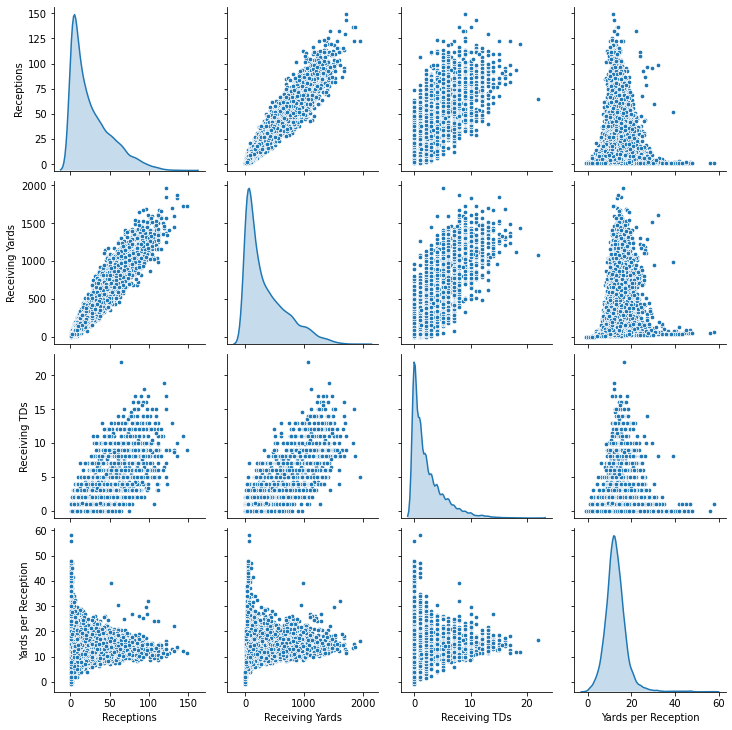

In [73]:
numerics = combined_receiving[['Receptions', 'Receiving Yards', 'Receiving TDs', 'Yards per Reception']]
sns.pairplot(numerics, diag_kind='kde', plot_kws={"s": 21})
plt.show()

In [74]:
receiving_by_year = combined_receiving.groupby(['Year']).sum()
receiving_by_year['Yards per Reception'] = receiving_by_year['Receiving Yards'] / receiving_by_year['Receptions']
receiving_by_year['Yards per Reception'] = receiving_by_year['Yards per Reception'].fillna(0)
receiving_by_year['Yards per Rush'] = receiving_by_year['Rushing Yards'] / receiving_by_year['Rushing Attempts']
receiving_by_year['Yards per Rush'] = receiving_by_year['Yards per Rush'].fillna(0)
receiving_by_year.head()

Games Played  Receptions  Receiving Yards  Receiving TDs  \
Year                                                             
1970         894.0      1576.0          25424.0          180.0   
1971         911.0      1463.0          23384.0          160.0   
1972         937.0      1483.0          24002.0          172.0   
1973         867.0      1363.0          21003.0          169.0   
1974        1051.0      1692.0          25867.0          166.0   

      Rushing Attempts  Rushing Yards  Rushing TDs  Yards per Reception  \
Year                                                                      
1970              54.0          396.0          1.0            16.131980   
1971              93.0          708.0          2.0            15.983595   
1972              94.0          579.0          3.0            16.184761   
1973              73.0          382.0          4.0            15.409391   
1974              67.0          228.0          3.0            15.287825   

      Yards per Rush  
Year                  
1970        7.333333  
1971        7.612903  
1972        6.159574  
1973        5.232877  
1974        3.402985

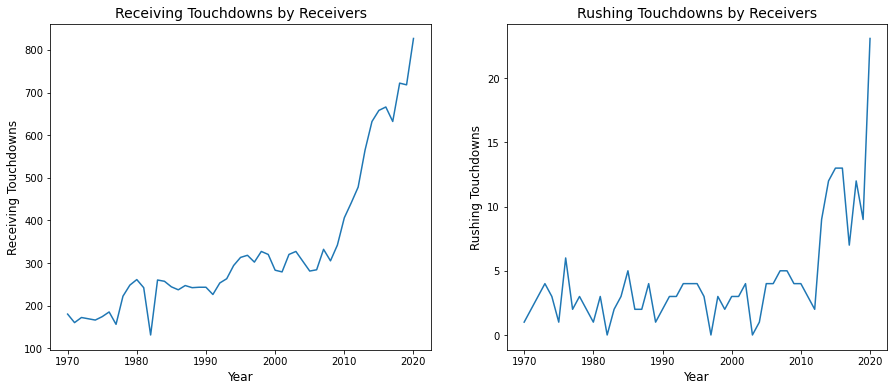

In [75]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(receiving_by_year['Receiving TDs'])
plt.title('Receiving Touchdowns by Receivers', fontsize=14)
plt.xlabel('Year', fontsize=12), plt.ylabel('Receiving Touchdowns', fontsize=12)

plt.subplot(122)
plt.plot(receiving_by_year['Rushing TDs'])
plt.title('Rushing Touchdowns by Receivers', fontsize=14)
plt.xlabel('Year', fontsize=12), plt.ylabel('Rushing Touchdowns', fontsize=12)
plt.show()

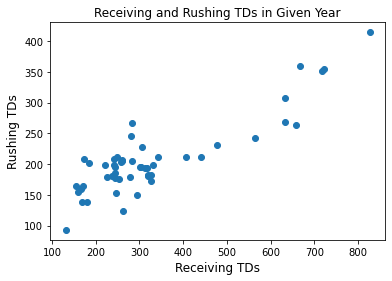

In [76]:
#We will look at touchdown trends between tables. This looks at rushing touchdowns by RBs scattered with receiving TDs
#by WRs

plt.scatter(receiving_by_year['Receiving TDs'], rush_by_year['Rushing TDs'])
plt.title('Receiving and Rushing TDs in Given Year')
plt.xlabel('Receiving TDs', fontsize=12), plt.ylabel('Rushing TDs', fontsize=12)
plt.show()

In [77]:
import sqlite3

In [78]:
conn = sqlite3.connect('RBs.db')
c = conn.cursor()

In [79]:
c.execute('CREATE TABLE rush (name text, year integer, games_played integer, rushing_attempts float, rushing_yards float, rushing_tds float, receptions float, receiving_yards float, receiving_tds float, yard_per_rush float, yards_per_reception float, PRIMARY KEY (year))')
conn.commit()

OperationalError: table rush already exists

In [ ]:
combined_rushing.to_sql('rush', conn, if_exists='replace', index = True)

In [ ]:
cursor = conn.cursor()
rows = cursor.execute('SELECT * FROM rush')
for row in rows:
    print(row)

In [ ]:
conn = sqlite3.connect('WRs.db')
c = conn.cursor()

In [ ]:
c.execute('CREATE TABLE receive (name text, year integer, games_played integer, receptions float, receiving_yards float, receiving_tds float, rushing_attempts float, rushing_yards float, rushing_tds float, yard_per_reception float, yards_per_rush float, PRIMARY KEY (year))')
conn.commit()

In [ ]:
combined_receiving.to_sql('receive', conn, if_exists='replace', index = True)

In [ ]:
cursor = conn.cursor()
rows = cursor.execute('SELECT * FROM receive')
for row in rows:
    print(row)

In [81]:
combined_rushing.to_excel("rushing1.xlsx")